Name: Ashish kumar sant
Roll: 102317018


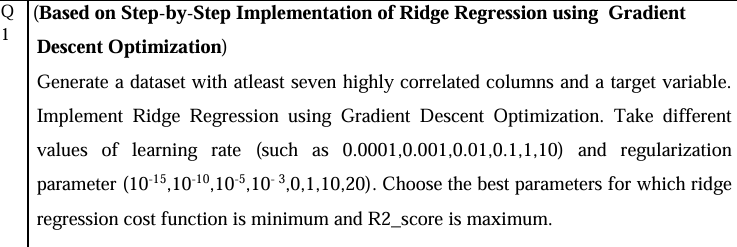

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(0)
N = 500
z_val = np.random.randn(N)
features = np.column_stack([z_val + 0.01 * np.random.randn(N) for _ in range(7)])
features = np.column_stack([features, 0.5 * z_val + 0.2 * np.random.randn(N)])
true_weights = np.array([3, -2, 1, 0, 0.5, -1, 2, 4], dtype=float)
target = features.dot(true_weights) + 0.5 * np.random.randn(N)

X_tr, X_te, y_tr, y_te = train_test_split(features, target, test_size=0.25, random_state=1)

mean_vals = X_tr.mean(axis=0)
std_vals = X_tr.std(axis=0)
std_vals = np.where(np.isfinite(std_vals) & (std_vals > 0), std_vals, 1.0)
X_tr = (X_tr - mean_vals) / std_vals
X_te = (X_te - mean_vals) / std_vals

def ridge_reg(X, y, alpha, lam, iters=2000):
    X = X.astype(np.float64); y = y.astype(np.float64)
    m, n = X.shape
    wts = np.zeros(n, dtype=np.float64)
    bias = 0.0
    for _ in range(iters):
        preds = X.dot(wts) + bias
        diff = preds - y
        grad_wts = (2 / m) * (X.T.dot(diff)) + 2 * lam * wts
        grad_bias = (2 / m) * diff.sum()
        wts -= alpha * grad_wts
        bias -= alpha * grad_bias
        if not (np.isfinite(wts).all() and np.isfinite(bias)):
            return None
    return wts, bias

alphas = [0.0001, 0.001, 0.01, 0.1]
lambdas = [0, 0.001, 0.01, 0.1, 1, 10]
top_r2 = -1
opt_params = None

for a in alphas:
    for lam in lambdas:
        outcome = ridge_reg(X_tr, y_tr, a, lam)
        if outcome is None:
            continue
        wts, bias = outcome
        preds = X_te.dot(wts) + bias
        if not np.isfinite(preds).all():
            continue
        r2_val = r2_score(y_te, preds)
        if r2_val > top_r2:
            top_r2 = r2_val
            opt_params = (a, lam, r2_val)

print("Optimal LR, Lambda, R2 =", opt_params)


Optimal LR, Lambda, R2 = (0.1, 0, 0.9920703853817209)


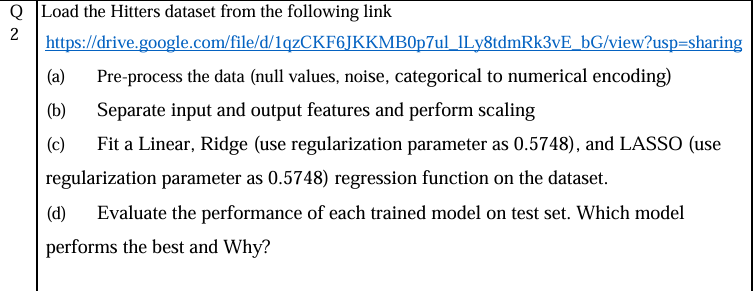

In [7]:
import pandas as pd
data = pd.read_csv("Hitters.csv")
data = data.dropna(subset=["Salary"])
data = data.fillna(data.median(numeric_only=True))
for col in ["League", "Division", "NewLeague"]:
    data[col] = data[col].astype("category").cat.codes

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = data.drop("Salary", axis=1)
y = data["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
model_lr = LinearRegression().fit(X_train, y_train)
model_ridge = Ridge(alpha=0.5748).fit(X_train, y_train)
model_lasso = Lasso(alpha=0.5748, max_iter=5000).fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
for name, mdl in [("Linear", model_lr), ("Ridge", model_ridge), ("Lasso", model_lasso)]:
    preds = mdl.predict(X_test)
    print(name, mean_squared_error(y_test, preds), r2_score(y_test, preds))


Linear 131898.53472017136 0.5531784057871476
Ridge 128967.77296468576 0.5631067013714948
Lasso 128572.34347396714 0.5644462646639643


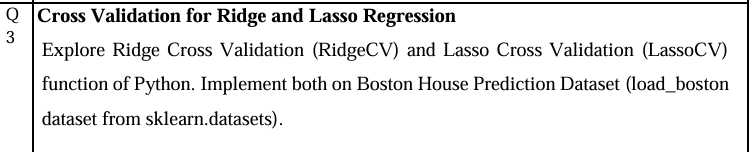

In [8]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import r2_score
import numpy as np

data = fetch_openml("boston", version=1, as_frame=False)
X, y = data.data, data.target.astype(float)

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=1)

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_te = scaler.transform(X_te)

alpha_values = np.logspace(-6, 6, 13)

ridge_model = RidgeCV(alphas=alpha_values, cv=5).fit(X_tr, y_tr)
lasso_model = LassoCV(alphas=alpha_values, cv=5, max_iter=5000).fit(X_tr, y_tr)

print("Ridge best alpha:", ridge_model.alpha_)
print("Ridge R2:", r2_score(y_te, ridge_model.predict(X_te)))
print("Lasso best alpha:", lasso_model.alpha_)
print("Lasso R2:", r2_score(y_te, lasso_model.predict(X_te)))


Ridge best alpha: 10.0
Ridge R2: 0.7775108393295395
Lasso best alpha: 0.01
Lasso R2: 0.7787621490259895


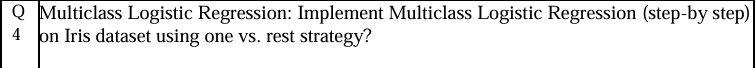

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report

data = load_iris()
X = data.data
y = data.target

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
X_tr = sc.fit_transform(X_tr)
X_te = sc.transform(X_te)

clf = OneVsRestClassifier(LogisticRegression(max_iter=2000))
clf.fit(X_tr, y_tr)

y_pred = clf.predict(X_te)

print("Accuracy:", accuracy_score(y_te, y_pred))
print("\nClassification Report:\n", classification_report(y_te, y_pred))


Accuracy: 0.9111111111111111

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.83      0.88        18
           2       0.77      0.91      0.83        11

    accuracy                           0.91        45
   macro avg       0.90      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

